In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(6000, 4000, 3)


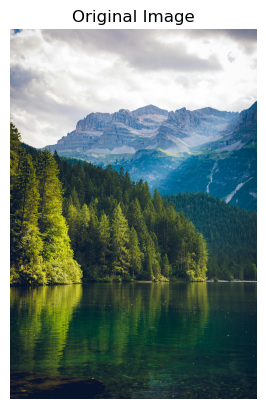

In [4]:
img = cv2.imread('/Users/230150/Downloads/nature.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w = img.shape[:2]
print(img.shape)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

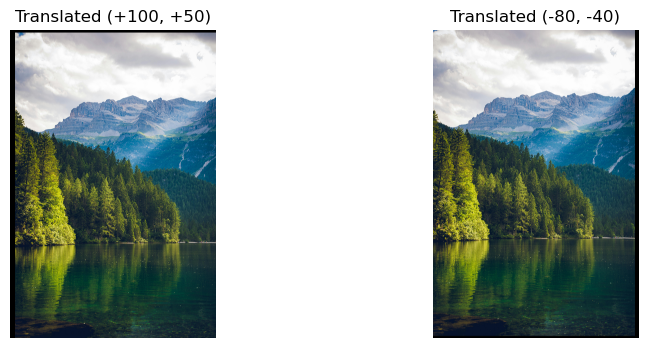

In [5]:
T1 = np.float32([[1, 0, 100], [0, 1, 50]])
translated_1 = cv2.warpAffine(image, T1, (w, h))

T2 = np.float32([[1, 0, -80], [0, 1, -40]])
translated_2 = cv2.warpAffine(image, T2, (w, h))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(translated_1)
plt.title("Translated (+100, +50)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_2)
plt.title("Translated (-80, -40)")
plt.axis("off")

plt.show()

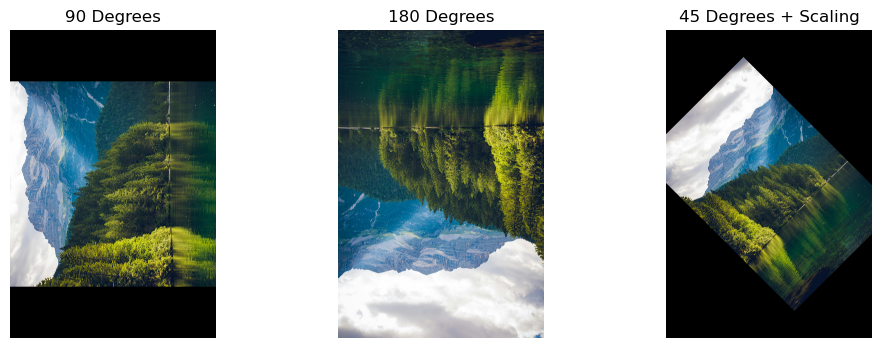

In [6]:
center = (w // 2, h // 2)

# Rotate 90 degrees
R1 = cv2.getRotationMatrix2D(center, 90, 1.0)
rot_90 = cv2.warpAffine(image, R1, (w, h))

# Rotate 180 degrees
R2 = cv2.getRotationMatrix2D(center, 180, 1.0)
rot_180 = cv2.warpAffine(image, R2, (w, h))

# Rotate 45 degrees with scaling
R3 = cv2.getRotationMatrix2D(center, 45, 0.7)
rot_scaled = cv2.warpAffine(image, R3, (w, h))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(rot_90)
plt.title("90 Degrees")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(rot_180)
plt.title("180 Degrees")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(rot_scaled)
plt.title("45 Degrees + Scaling")
plt.axis("off")

plt.show()

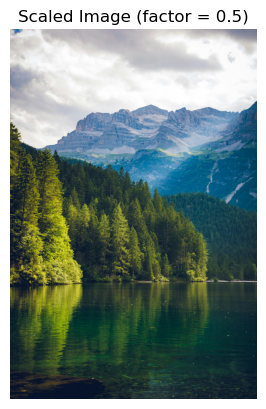

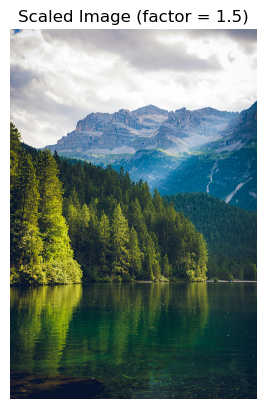

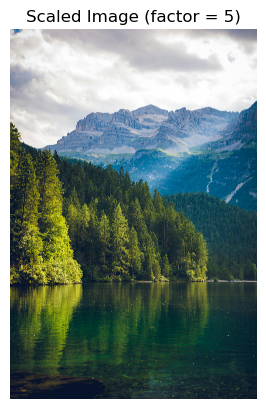

In [7]:
factors = [0.5, 1.5, 5]

for f in factors:
    scale_matrix = cv2.getRotationMatrix2D((0, 0), 0, f)
    scaled = cv2.warpAffine(image, scale_matrix, (int(w*f), int(h*f)))

    plt.imshow(scaled)
    plt.title(f"Scaled Image (factor = {f})")
    plt.axis("off")
    plt.show()

    cv2.imwrite(f"scaled_{f}.png", cv2.cvtColor(scaled, cv2.COLOR_RGB2BGR))

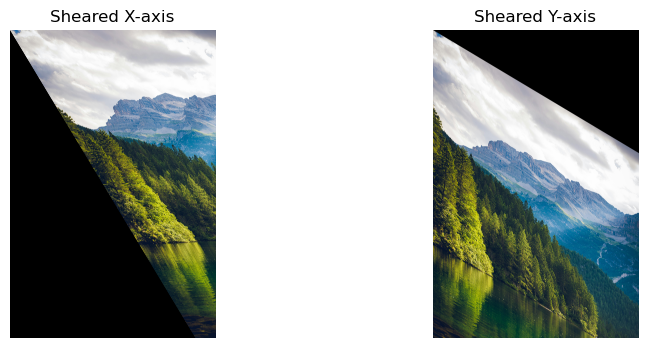

In [8]:
mx = 0.6
shear_x = np.float32([[1, mx, 0], [0, 1, 0]])
sheared_x = cv2.warpAffine(image, shear_x, (w, h))

my = 0.6
shear_y = np.float32([[1, 0, 0], [my, 1, 0]])
sheared_y = cv2.warpAffine(image, shear_y, (w, h))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(sheared_x)
plt.title("Sheared X-axis")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_y)
plt.title("Sheared Y-axis")
plt.axis("off")

plt.show()

In [ ]:
REPORT

The purpose of this lab was to study affine transformations and understand how they affect digital images. Affine transformations preserve straight lines and parallelism, but they can change position, size, orientation, and shape of objects in the image. In this lab, I performed translation, rotation, scaling, and shearing using OpenCV in Python.

Translation

Translation shifts an image from one position to another by changing pixel coordinates.
I applied both positive and negative shifts. Positive values moved the image right and down, while negative values moved it left and up. The shape of the object did not change — only its position changed.

This operation showed that translation preserves the original structure of the image without distortion.

Rotation

Rotation changes the orientation of the image around a fixed point (usually the center).
I rotated the image by 90° and 180°, and also experimented with rotation combined with scaling.

I observed that rotation keeps the proportions of the image but changes its direction. When scaling is added, the image becomes smaller or larger during rotation.

Scaling

Scaling changes the size of the image using scaling factors.
I tested different factors such as 0.5, 1.5, and larger values like 5.

When the scaling factor is small (less than 1), the image becomes smaller but remains clear.
When using very large factors, the image quality decreases. It becomes blurry or pixelated because the original resolution is limited.

This demonstrates that extreme scaling affects image quality significantly.

Shearing

Shearing tilts the image along the x-axis or y-axis.
I applied different shearing factors and observed that the image becomes slanted.

Shearing distorts the shape of objects, but straight lines remain straight and parallel. However, the proportions of the image change, making it look stretched in one direction.

In this lab, I learned how affine transformations modify images geometrically. Translation changes position, rotation changes orientation, scaling changes size, and shearing changes shape.

These transformations are important in image processing and are widely used in data augmentation techniques in deep learning and computer vision applications.